In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
airline_df=pd.read_csv(url,parse_dates = True,index_col='Month')

In [3]:
airline_df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot: xlabel='Month'>

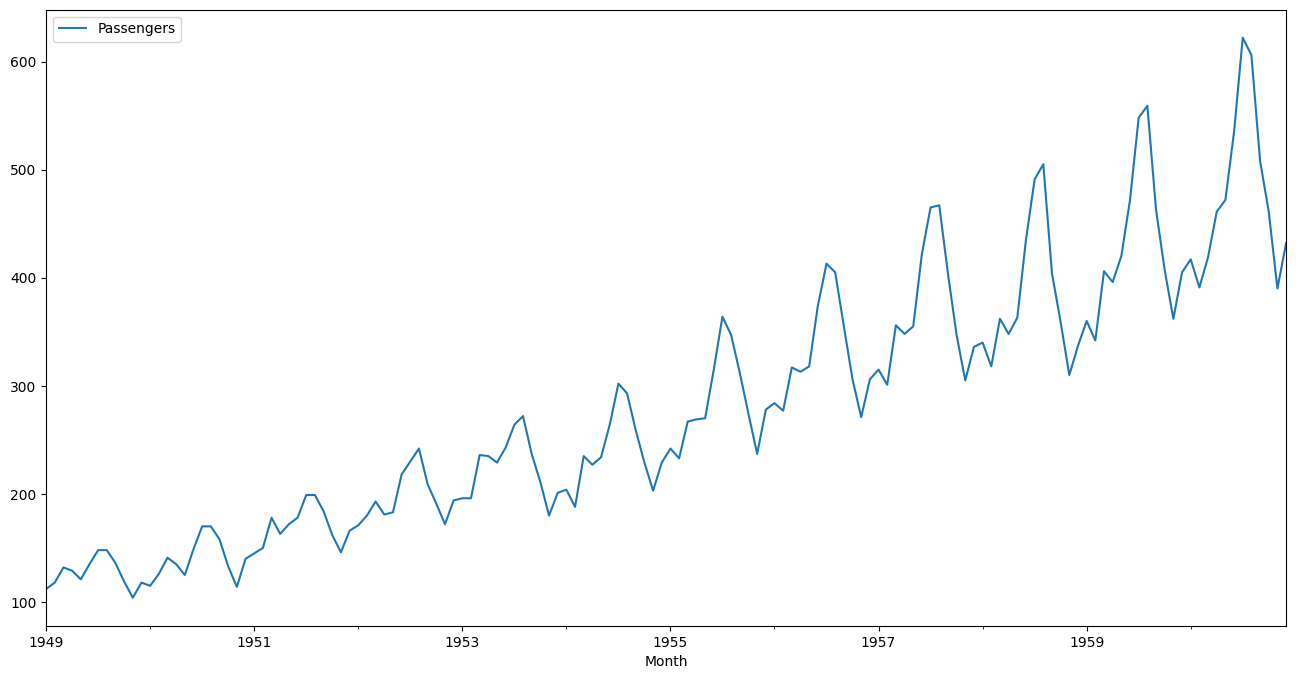

In [4]:
airline_df = airline_df.asfreq('MS') 
airline_df = airline_df.fillna(method='ffill')
airline_df.plot(figsize=(16,8))


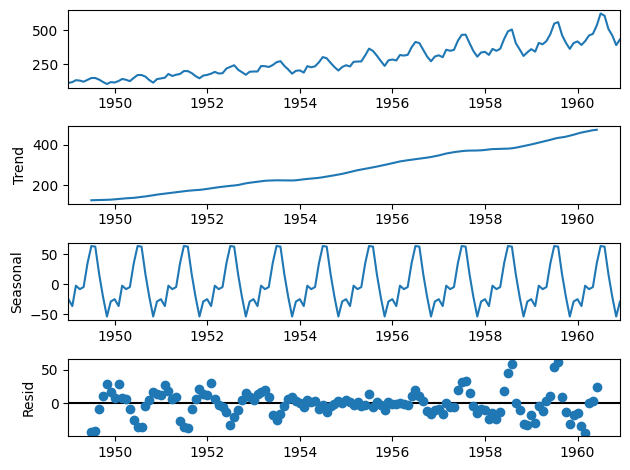

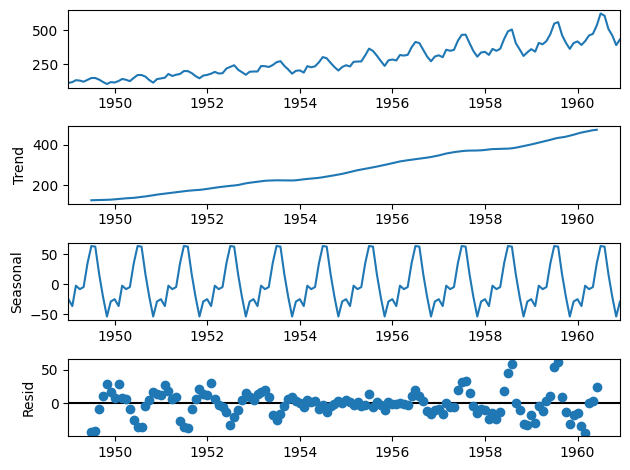

In [5]:
res = seasonal_decompose(airline_df, model='add')
res.plot()

In [6]:
auto_arima(airline_df, seasonal=True, m=12, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=0.63 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.08 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.36 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.11 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.35 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.05 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.10 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.29 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.27 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=0.60 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.03 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.02 sec
 ARIMA(3,1,1)(0,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Wed, 02 Nov 2022   AIC                           1017.847
Time:                                     09:00:20   BIC                           1029.348
Sample:                                 01-01-1949   HQIC                          1022.520
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5959      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.605      0.000      -1.057      -0.907
sigma2       129.3125     14.556      8.884      0.000     100.783     157.842
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.28669D+00    |proj g|=  1.88405D-01

At iterate    5    f=  3.26499D+00    |proj g|=  1.72100D-02

At iterate   10    f=  3.26079D+00    |proj g|=  1.89334D-03

At iterate   15    f=  3.26076D+00    |proj g|=  5.06212D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   7.285D-06   3.261D+00
  F =   3.2607639143978067     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/amardeepsingh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/amardeepsingh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


<AxesSubplot: xlabel='Month'>

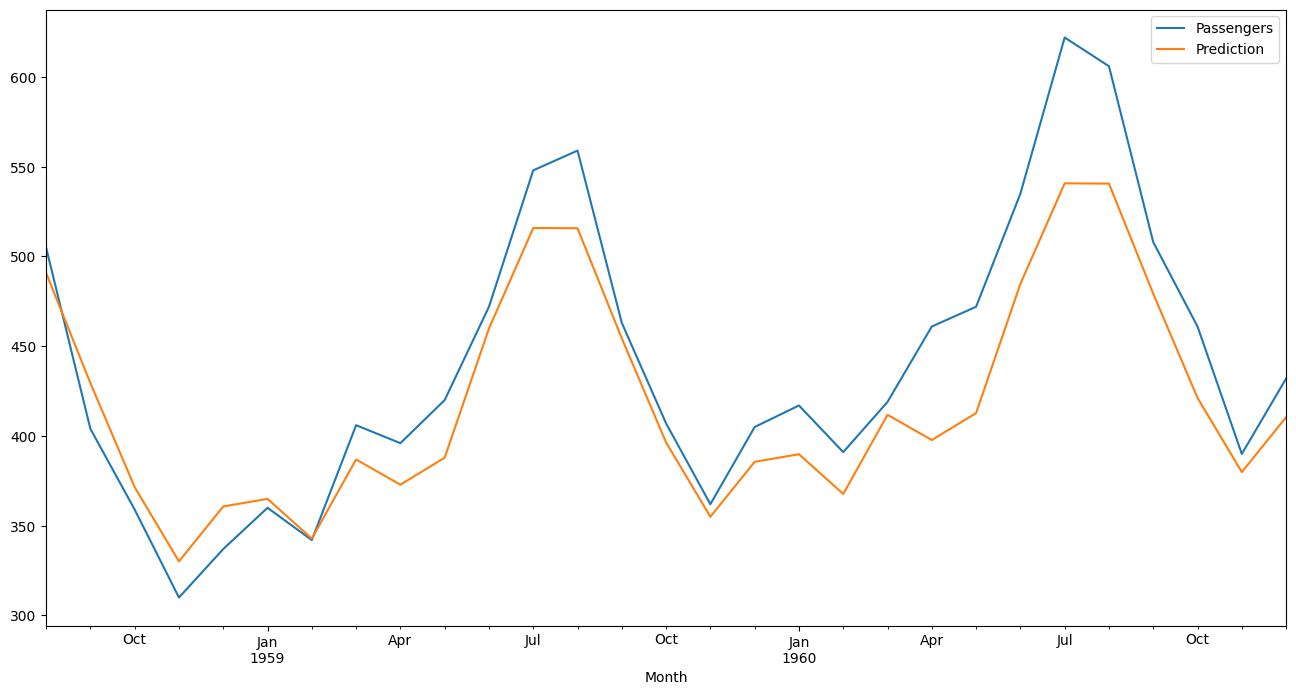

In [16]:
# SARIMA (2,1,1)(0,1,0)[12]
size = int(len(airline_df)*0.8)
train_df=airline_df.iloc[:size]
test_df=airline_df.iloc[size:]
model = SARIMAX(train_df, order=(2, 1, 1),
               seasonal_order=(0, 1, 0, 12))
res = model.fit()
start = len(train_df)
end = len(train_df) + len(test_df) - 1
prediction = res.predict(start, end, 
                         typ='linear').rename('Prediction')
test_df.plot(legend=True, figsize=(16,8))
prediction.plot(legend=True)


# Test Prediction

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
airline_df.mean()


Passengers    280.298611
dtype: float64

In [9]:
np.sqrt(mean_squared_error(test_df, prediction))

33.63390277448183

# Future Prediction

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.57610D+00    |proj g|=  3.04448D-01

At iterate    5    f=  3.52912D+00    |proj g|=  2.12219D-03

At iterate   10    f=  3.52819D+00    |proj g|=  7.65533D-03

At iterate   15    f=  3.52185D+00    |proj g|=  2.59446D-02

At iterate   20    f=  3.51065D+00    |proj g|=  2.82501D-02

At iterate   25    f=  3.50647D+00    |proj g|=  9.68125D-04

At iterate   30    f=  3.50641D+00    |proj g|=  8.57705D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/amardeepsingh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/amardeepsingh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


<AxesSubplot: xlabel='Month'>

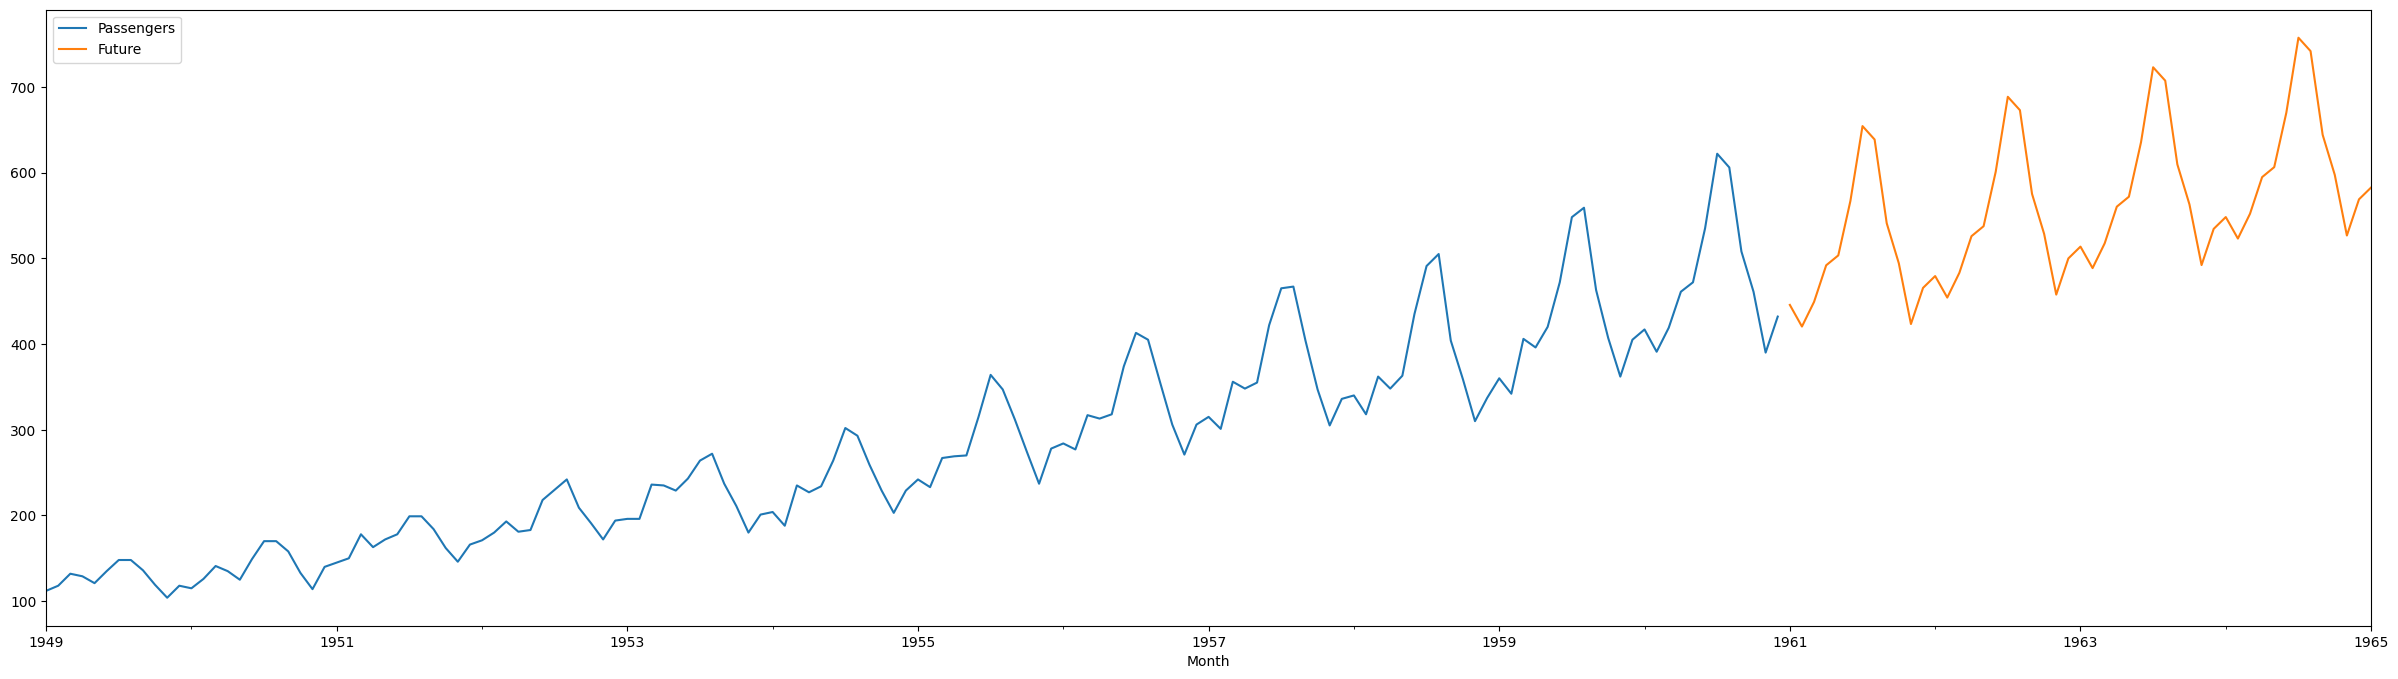

In [10]:
# Passenger count 4 years into the future
model = SARIMAX(airline_df, order=(2, 1, 1),
               seasonal_order=(0, 1, 0, 12))
res = model.fit()
future = res.predict(len(airline_df), len(airline_df)+48, 
                    typ='levels').rename('Future')
airline_df.plot(legend=True, figsize=(30,8))
future.plot(legend=True)

ARIMA

In [11]:
auto_arima(airline_df, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -674.913
Date:                Wed, 02 Nov 2022   AIC                           1365.825
Time:                        09:00:24   BIC                           1389.528
Sample:                    01-01-1949   HQIC                          1375.457
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.332      -0.126       0.374
ar.L4         -0.5213      0.085     -6.136      0.000      -0.688      -0.355
ma.L1          0.9069      0.094      9.657      0.000       0.723       1.091
ma.L2         -0.5590      0.145     -3.866      0.000      -0.842      -0.276
ma.L3         -0.7385      0.109     -6.778      0.000      -0.952      -0.525
sigma2       724.1723     85.616      8.458      0.000     556.369     891.976
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                14.59
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               5.66   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: xlabel='Month'>

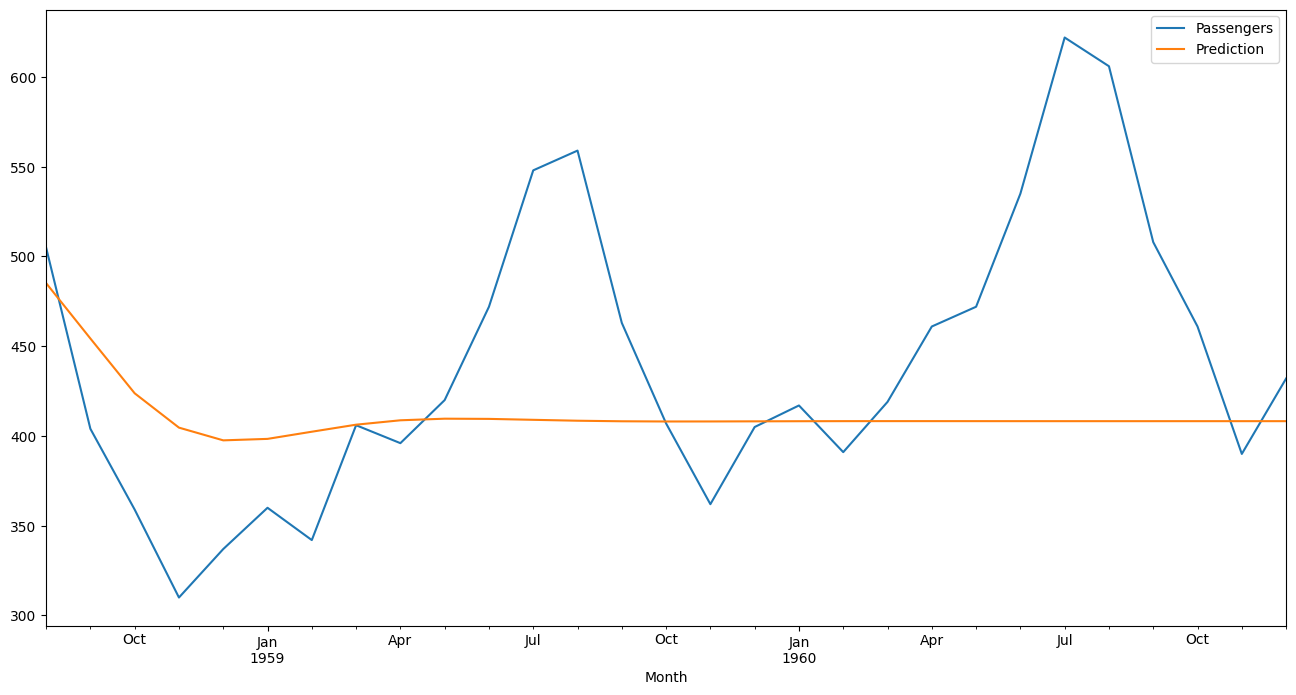

In [12]:
# SARIMA (4,1,3)
size = int(len(airline_df)*0.8)
arima_train_df=airline_df.iloc[:size]
arima_test_df=airline_df.iloc[size:]
model = ARIMA(arima_train_df, order=(2, 1, 1))
arima_res = model.fit()
arima_start = len(arima_train_df)
arima_end = len(arima_train_df) + len(arima_test_df) - 1
arima_prediction = arima_res.predict(arima_start,arima_end, 
                         typ='linear').rename('Prediction')
arima_test_df.plot(legend=True, figsize=(16,8))
arima_prediction.plot(legend=True)

In [13]:
np.sqrt(mean_squared_error(arima_test_df, arima_prediction))

82.62109671783075

<AxesSubplot: xlabel='Month'>

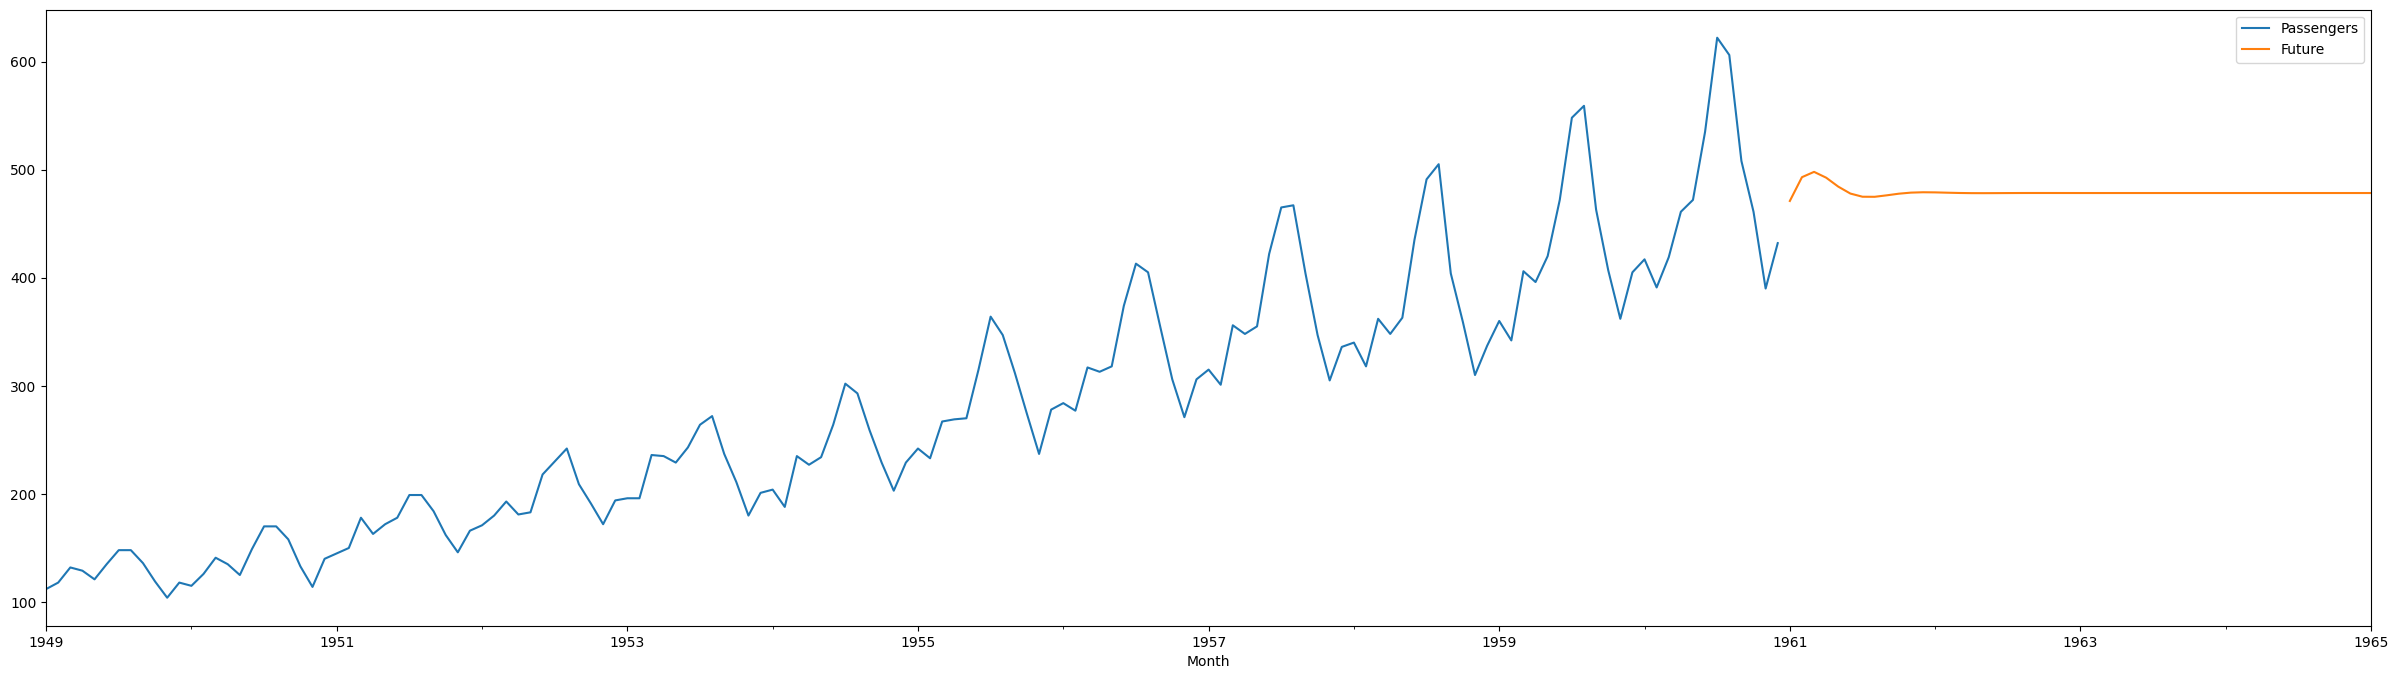

In [14]:
arima_model = ARIMA(airline_df, order=(2, 1, 1))
arima_res = arima_model.fit()
arima_future = arima_res.predict(len(airline_df), len(airline_df)+48, 
                    typ='linear').rename('Future')
airline_df.plot(legend=True, figsize=(30,8))
arima_future.plot(legend=True)

Text(0.5, 1.0, 'SARIMA')

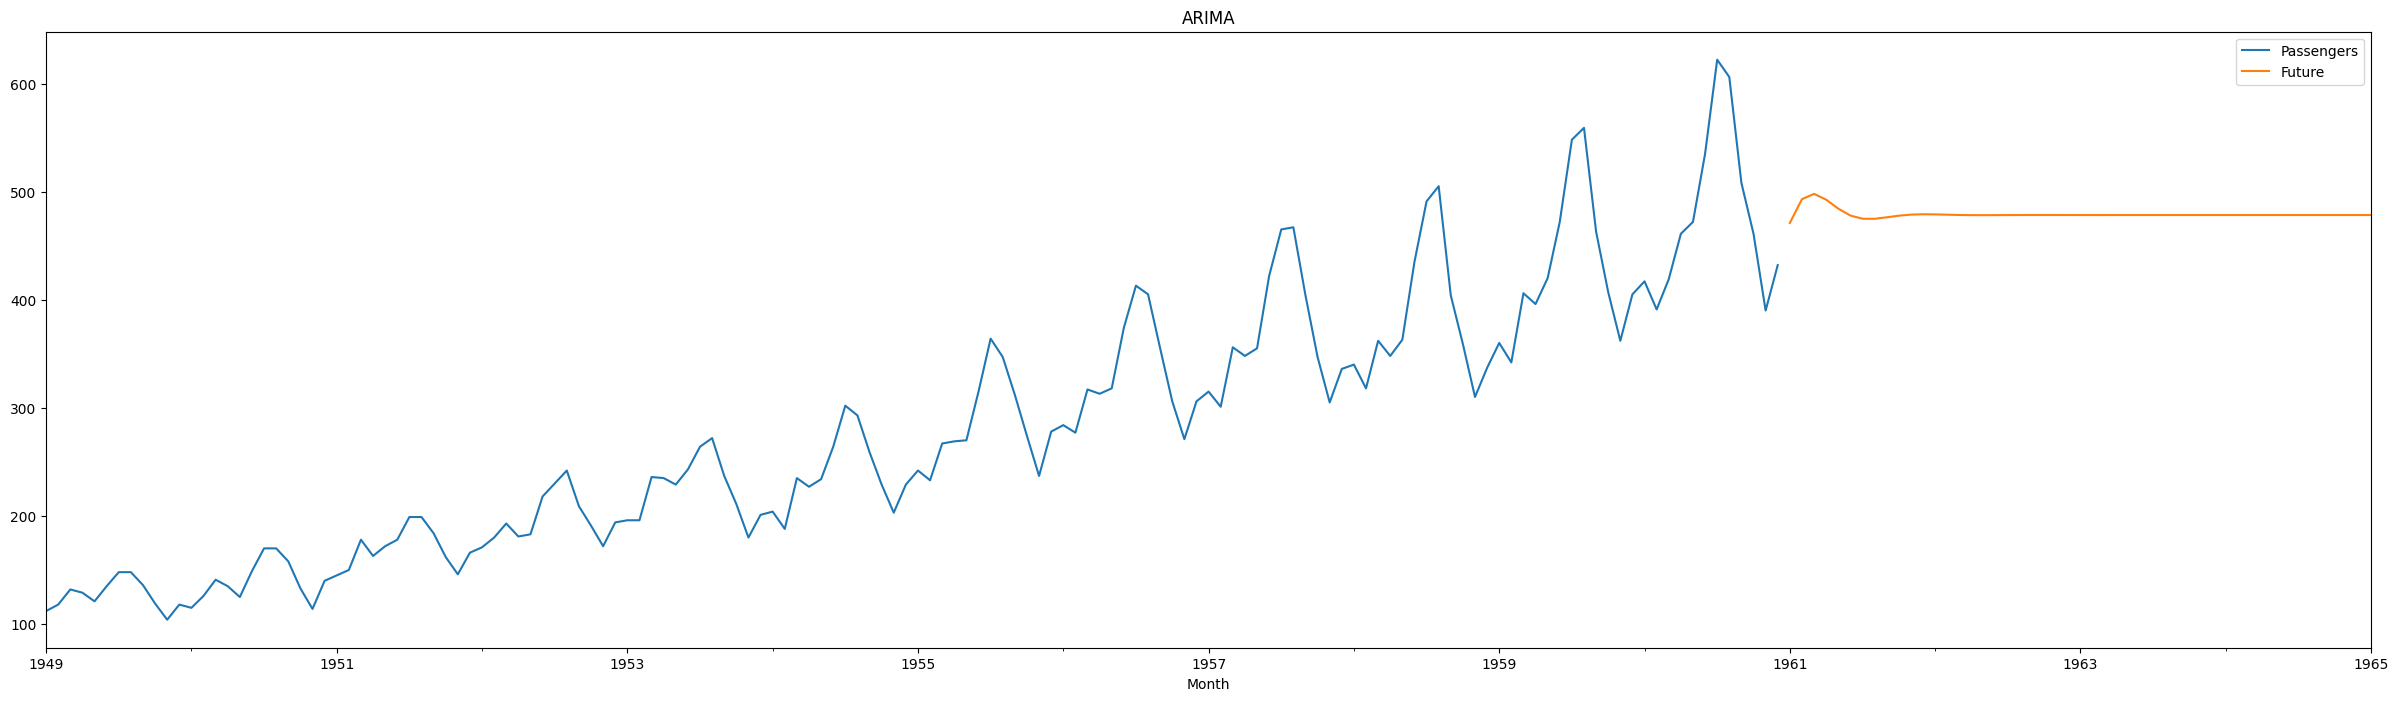

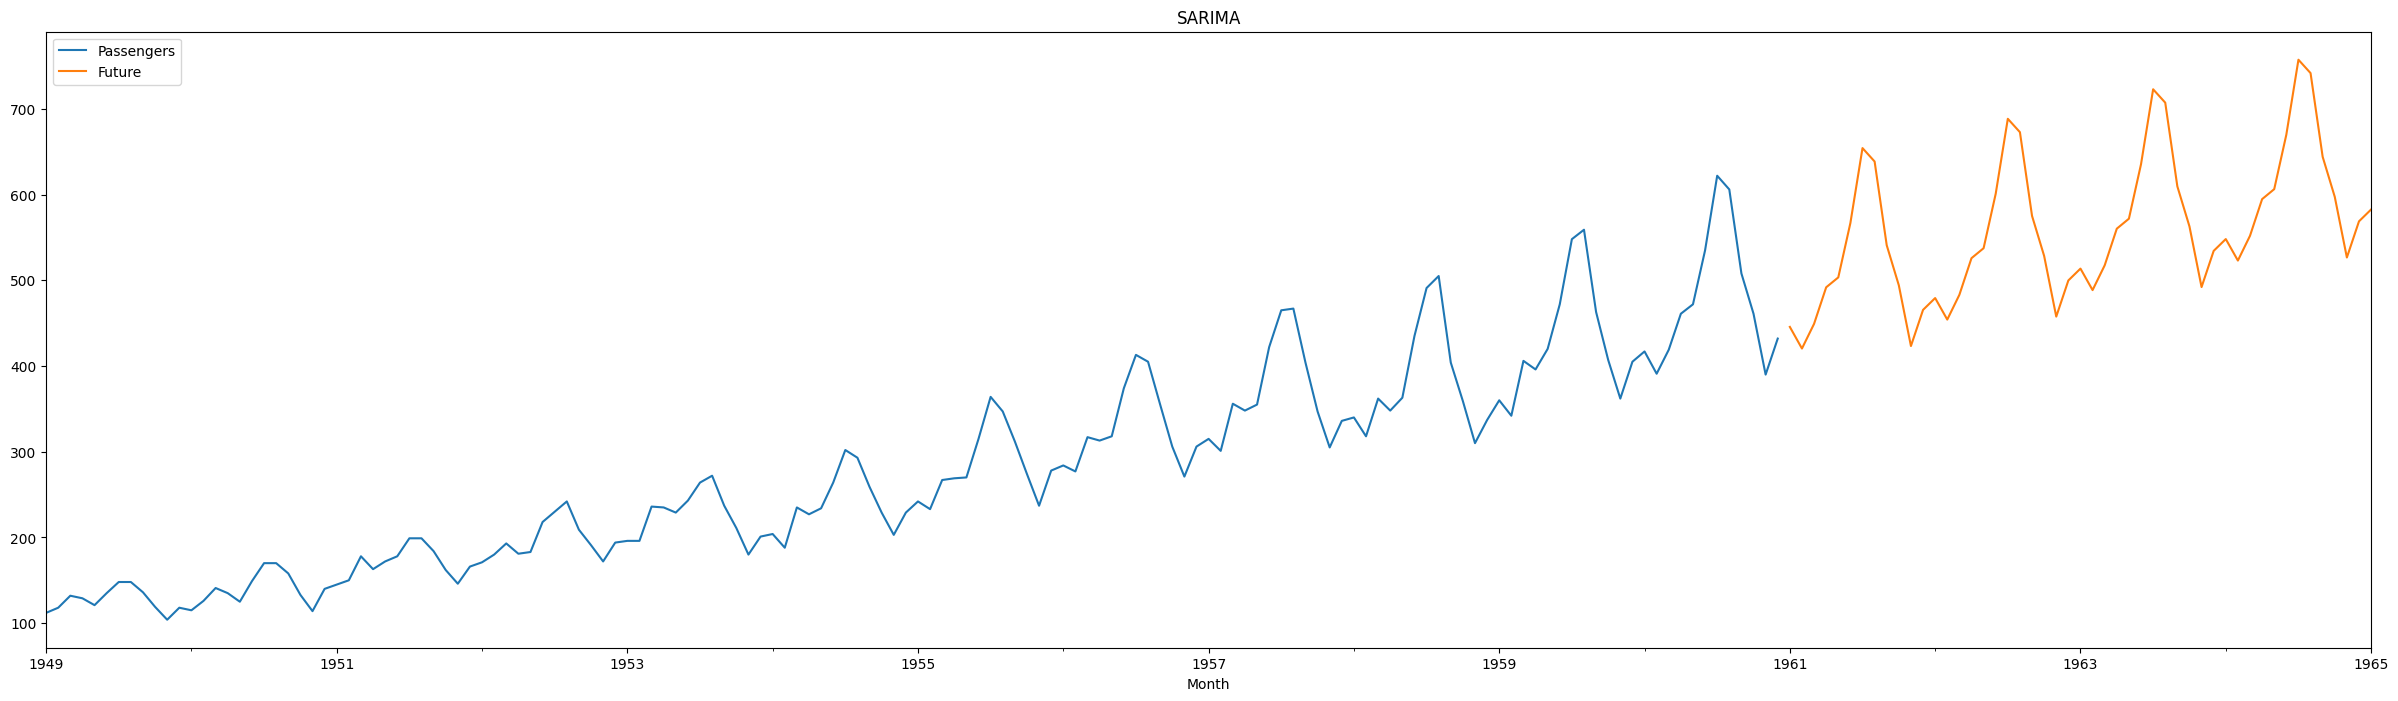

In [15]:
airline_df.plot(legend=True, figsize=(30,8))
arima_future.plot(legend=True)
plt.title("ARIMA")
airline_df.plot(legend=True, figsize=(30,8))
future.plot(legend=True)
plt.title("SARIMA")